# Predicting Stock Price for tata Motors Stocks with Random Forest Regressor

# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import lag_plot

In [2]:
df = pd.read_csv('/kaggle/input/tata-motors-1991-2024/TATAMOTORS.NS.csv')

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1991-01-02,20.959597,21.857864,20.959597,21.857864,15.738638,0.0
1,1991-01-03,20.959597,21.857864,20.959597,21.857864,15.738638,0.0
2,1991-01-04,21.857864,21.857864,21.857864,21.857864,15.738638,0.0
3,1991-01-07,20.360750,21.259020,20.061329,21.109308,15.199648,0.0
4,1991-01-08,21.109308,21.109308,21.109308,21.109308,15.199648,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8413 entries, 0 to 8412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8413 non-null   object 
 1   Open       8406 non-null   float64
 2   High       8406 non-null   float64
 3   Low        8406 non-null   float64
 4   Close      8406 non-null   float64
 5   Adj Close  8406 non-null   float64
 6   Volume     8406 non-null   float64
dtypes: float64(6), object(1)
memory usage: 460.2+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8406.000000,8406.000000,8406.000000,8406.000000,8406.000000,8.406000e+03
mean,181.027416,183.674083,178.069869,180.775048,172.765822,1.283110e+07
std,175.722133,177.725725,173.380376,175.458721,178.814801,1.947705e+07
min,11.114574,11.631977,11.028340,11.267879,9.071135,0.000000e+00
25%,46.798588,47.910046,45.655989,46.786608,36.076002,3.082774e+06
50%,101.765431,103.624248,100.083870,101.957062,88.889763,7.712053e+06
75%,286.470764,290.996330,281.621933,286.106216,282.566063,1.481041e+07
max,1034.750000,1065.599976,1021.000000,1039.300049,1039.300049,3.905778e+08


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# EDA

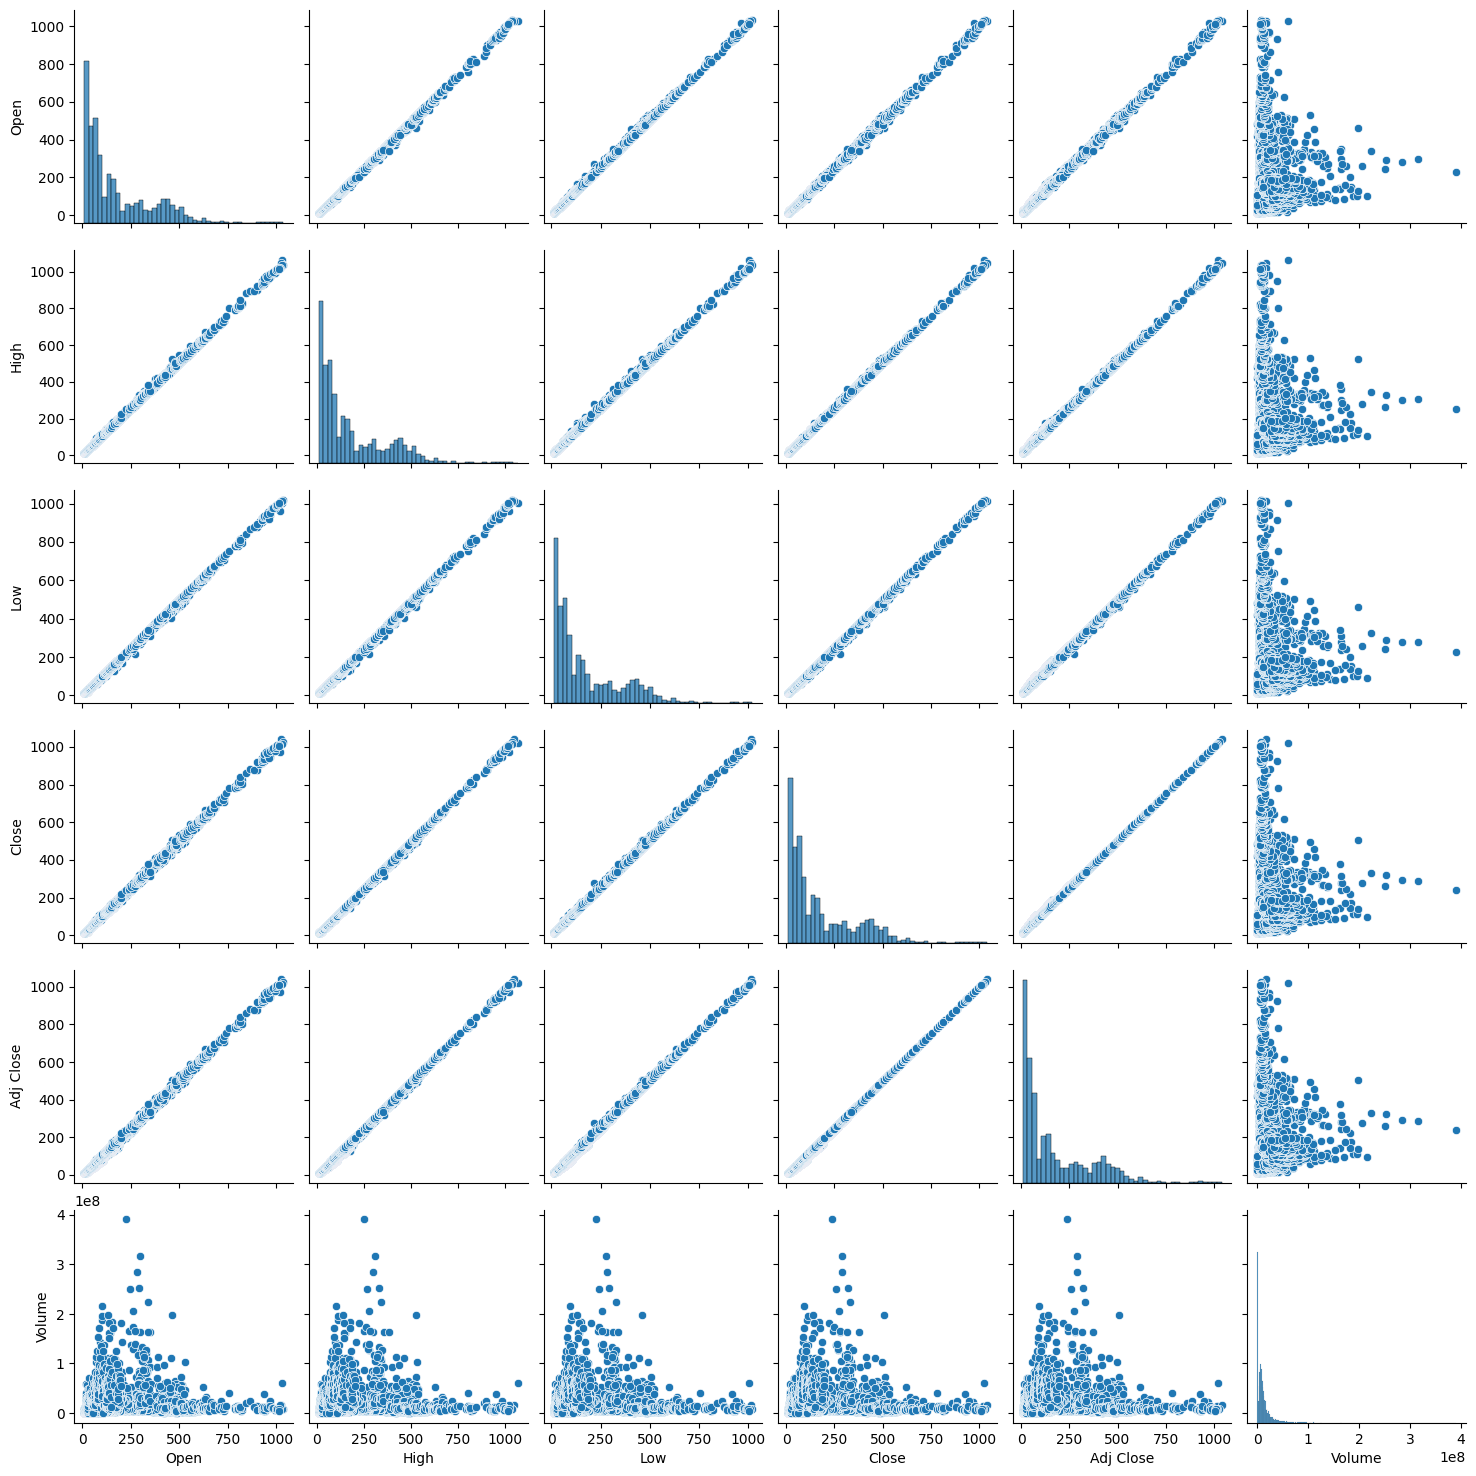

In [7]:
sns.pairplot(df)

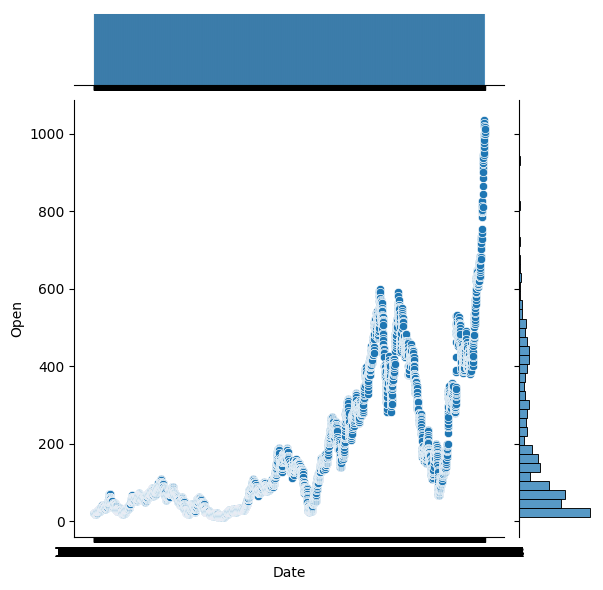

In [8]:
sns.jointplot(x='Date',y='Open',data=df)

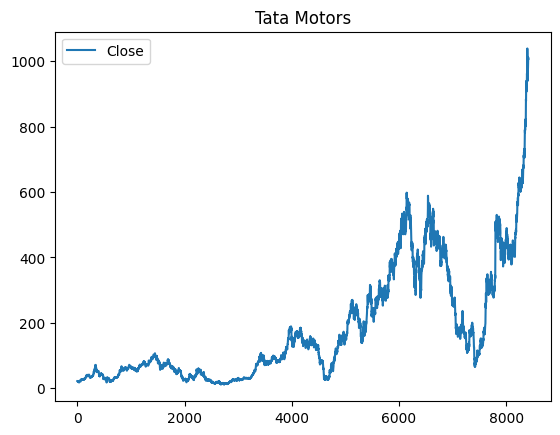

In [9]:
df[['Close']].plot()
plt.title('Tata Motors')
plt.show()

Text(0.5, 1.0, 'Tata Motors cummulative returns')

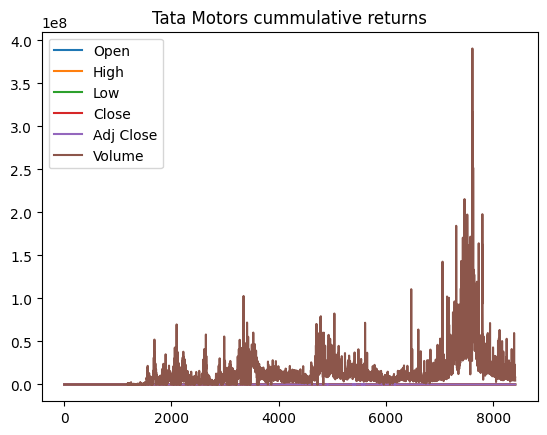

In [10]:
dr = df.cumsum()
df.plot()
plt.title('Tata Motors cummulative returns')

Text(0.5, 1.0, 'Tata Motors Autocorrelation plot')

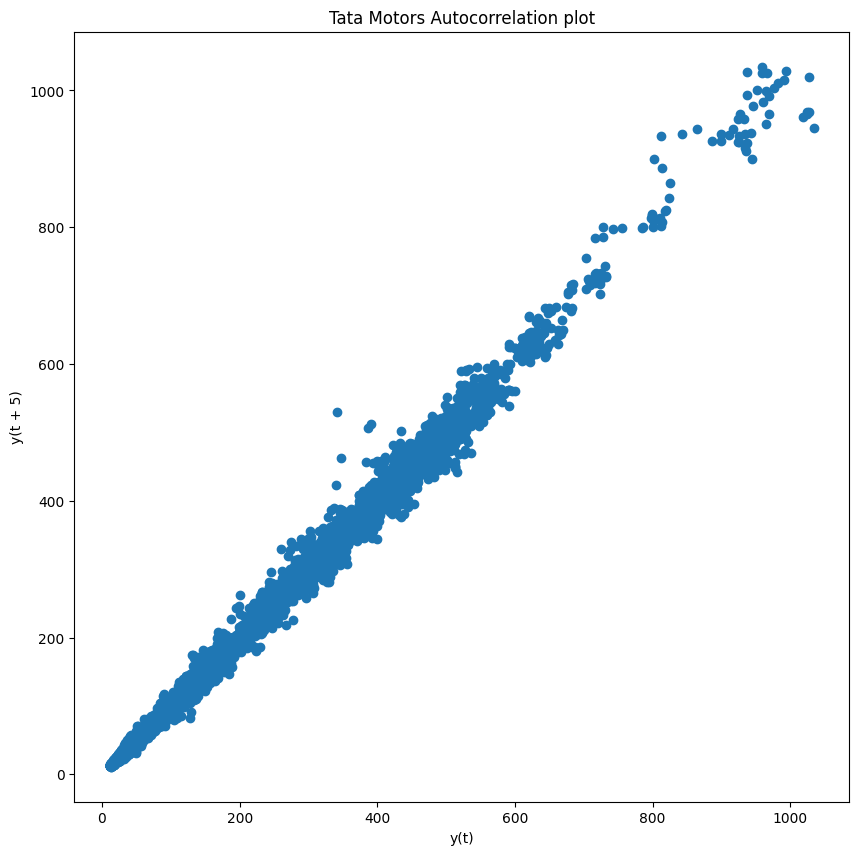

In [11]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Tata Motors Autocorrelation plot')

# Converting Date column into splits of year month day and Day of week

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [14]:
df['Quarter'] = df['Date'].dt.quarter
df['DayOfYear'] = df['Date'].dt.dayofyear

In [15]:
df.drop(columns=['Date'], inplace=True)

In [16]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,DayOfWeek,Quarter,DayOfYear
0,20.959597,21.857864,20.959597,21.857864,15.738638,0.0,1991,1,2,2,1,2
1,20.959597,21.857864,20.959597,21.857864,15.738638,0.0,1991,1,3,3,1,3
2,21.857864,21.857864,21.857864,21.857864,15.738638,0.0,1991,1,4,4,1,4
3,20.360750,21.259020,20.061329,21.109308,15.199648,0.0,1991,1,7,0,1,7
4,21.109308,21.109308,21.109308,21.109308,15.199648,0.0,1991,1,8,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
8408,1000.000000,1009.849976,987.450012,992.250000,992.250000,8629407.0,2024,4,1,0,2,92
8409,999.000000,1008.000000,993.400024,1004.650024,1004.650024,7995931.0,2024,4,2,1,2,93
8410,1004.000000,1014.450012,992.549988,1009.150024,1009.150024,8040366.0,2024,4,3,2,2,94
8411,1016.000000,1017.000000,998.150024,1011.599976,1011.599976,9138276.0,2024,4,4,3,2,95


# Fitering Data from 2016 to 2024

In [17]:
yer1 =df[(df['Year'] > 2015)]

In [18]:
yer1

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,DayOfWeek,Quarter,DayOfYear
6373,392.500000,403.000000,373.000000,401.899994,400.489075,4377363.0,2016,1,1,4,1,1
6374,400.000000,400.100006,375.049988,377.049988,375.726318,7822660.0,2016,1,4,0,1,4
6375,381.049988,382.450012,372.100006,374.450012,373.135468,6901068.0,2016,1,5,1,1,5
6376,374.250000,375.500000,364.600006,365.899994,364.615479,7211230.0,2016,1,6,2,1,6
6377,356.250000,358.000000,338.100006,343.549988,342.343933,11782307.0,2016,1,7,3,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
8408,1000.000000,1009.849976,987.450012,992.250000,992.250000,8629407.0,2024,4,1,0,2,92
8409,999.000000,1008.000000,993.400024,1004.650024,1004.650024,7995931.0,2024,4,2,1,2,93
8410,1004.000000,1014.450012,992.549988,1009.150024,1009.150024,8040366.0,2024,4,3,2,2,94
8411,1016.000000,1017.000000,998.150024,1011.599976,1011.599976,9138276.0,2024,4,4,3,2,95


<Axes: xlabel='Year', ylabel='Close'>

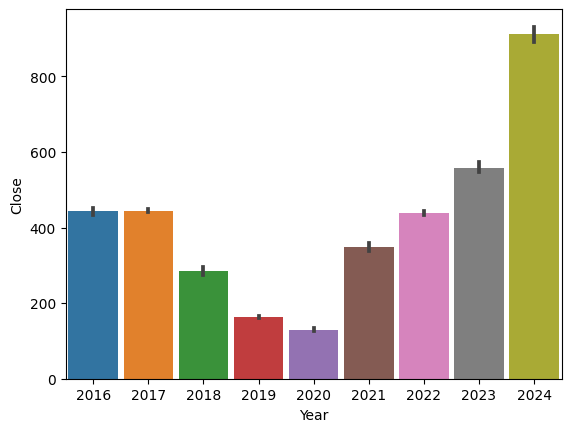

In [19]:
sns.barplot(x='Year',y='Close',data=yer1,width=0.9)

In [20]:
corry = yer1.corr()

Text(0.5, 1.0, 'Tata Motors')

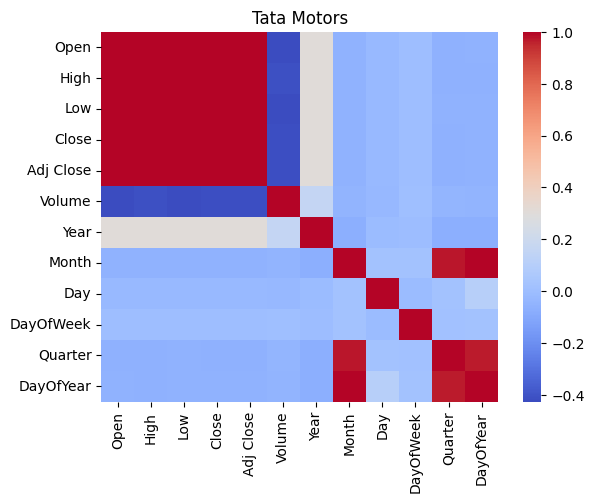

In [21]:
sns.heatmap(corry,cmap='coolwarm')
plt.title('Tata Motors')

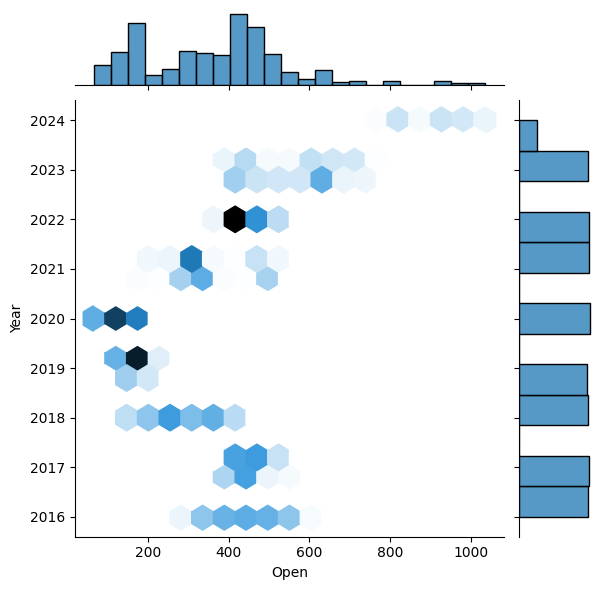

In [22]:
sns.jointplot(x='Open',y='Year',data=yer1,kind='hex',palette='Spectral')

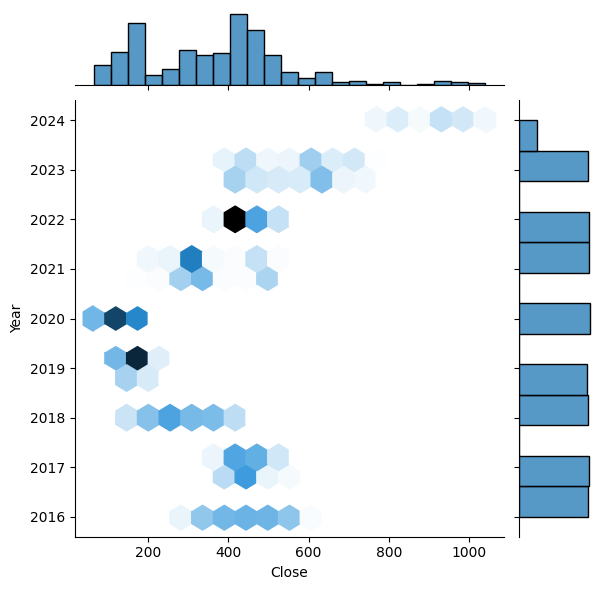

In [23]:
sns.jointplot(x='Close',y='Year',data=yer1,kind='hex')

<Axes: xlabel='Close'>

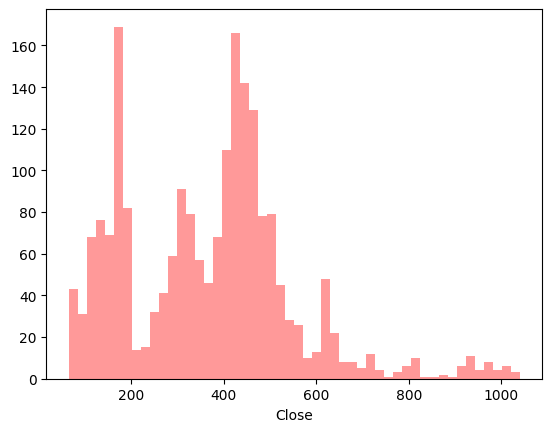

In [24]:
sns.distplot(yer1['Close'],bins=50,kde=False,color='red')

<Axes: xlabel='Open'>

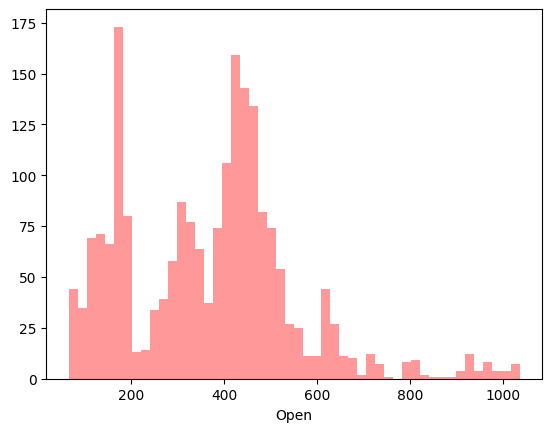

In [25]:
sns.distplot(yer1['Open'],bins=50,kde=False,color='red')

# Checking If there are any null Values 

In [26]:
yer1.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
Month        0
Day          0
DayOfWeek    0
Quarter      0
DayOfYear    0
dtype: int64

In [27]:
yer1

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,DayOfWeek,Quarter,DayOfYear
6373,392.500000,403.000000,373.000000,401.899994,400.489075,4377363.0,2016,1,1,4,1,1
6374,400.000000,400.100006,375.049988,377.049988,375.726318,7822660.0,2016,1,4,0,1,4
6375,381.049988,382.450012,372.100006,374.450012,373.135468,6901068.0,2016,1,5,1,1,5
6376,374.250000,375.500000,364.600006,365.899994,364.615479,7211230.0,2016,1,6,2,1,6
6377,356.250000,358.000000,338.100006,343.549988,342.343933,11782307.0,2016,1,7,3,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
8408,1000.000000,1009.849976,987.450012,992.250000,992.250000,8629407.0,2024,4,1,0,2,92
8409,999.000000,1008.000000,993.400024,1004.650024,1004.650024,7995931.0,2024,4,2,1,2,93
8410,1004.000000,1014.450012,992.549988,1009.150024,1009.150024,8040366.0,2024,4,3,2,2,94
8411,1016.000000,1017.000000,998.150024,1011.599976,1011.599976,9138276.0,2024,4,4,3,2,95


# Performing Train Test Split 

In [28]:
X = yer1[['Open','High','Low','Adj Close','Volume','Year','Month','Day','DayOfWeek',
         'Quarter','DayOfYear']]
y = yer1['Close']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building  Model

In [31]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust parameters as needed

In [32]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
y_pred = rf_model.predict(X_test)

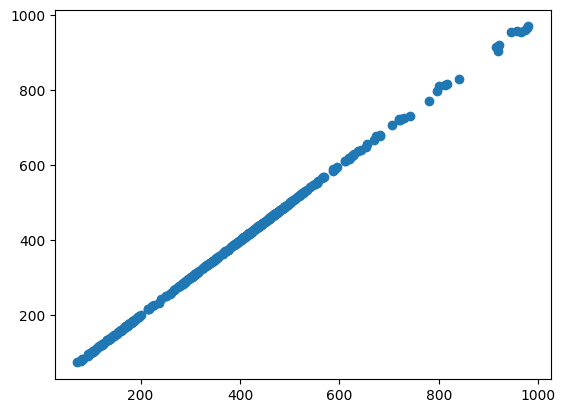

In [34]:
plt.scatter(y_test,y_pred)

<Axes: ylabel='Density'>

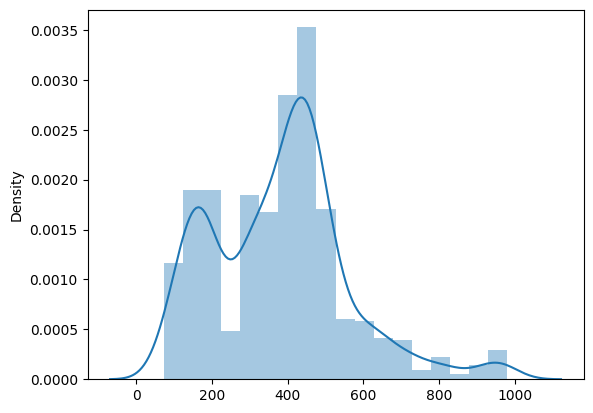

In [35]:
sns.distplot((y_test,y_pred))

# Model Evauation 

In [36]:
from sklearn import metrics

In [37]:
metrics.mean_absolute_error(y_test,y_pred)

0.6506275263480286

In [38]:
metrics.mean_squared_error(y_test,y_pred)

3.1424028569107527

In [39]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.7726823903087525

# Thank you